## Image Noising and De-Noising

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
image1=cv2.imread('1.jfif')
image2=cv2.imread('2.jfif')
image3=cv2.imread('3.jfif')

In [3]:
def showImages(images,images2):
    fig,ax=plt.subplots(len(images),2,figsize=(18,18))
    for i in range(len(images)):
        ax[i,0].imshow(images[i])
        ax[i,1].imshow(images2[i])

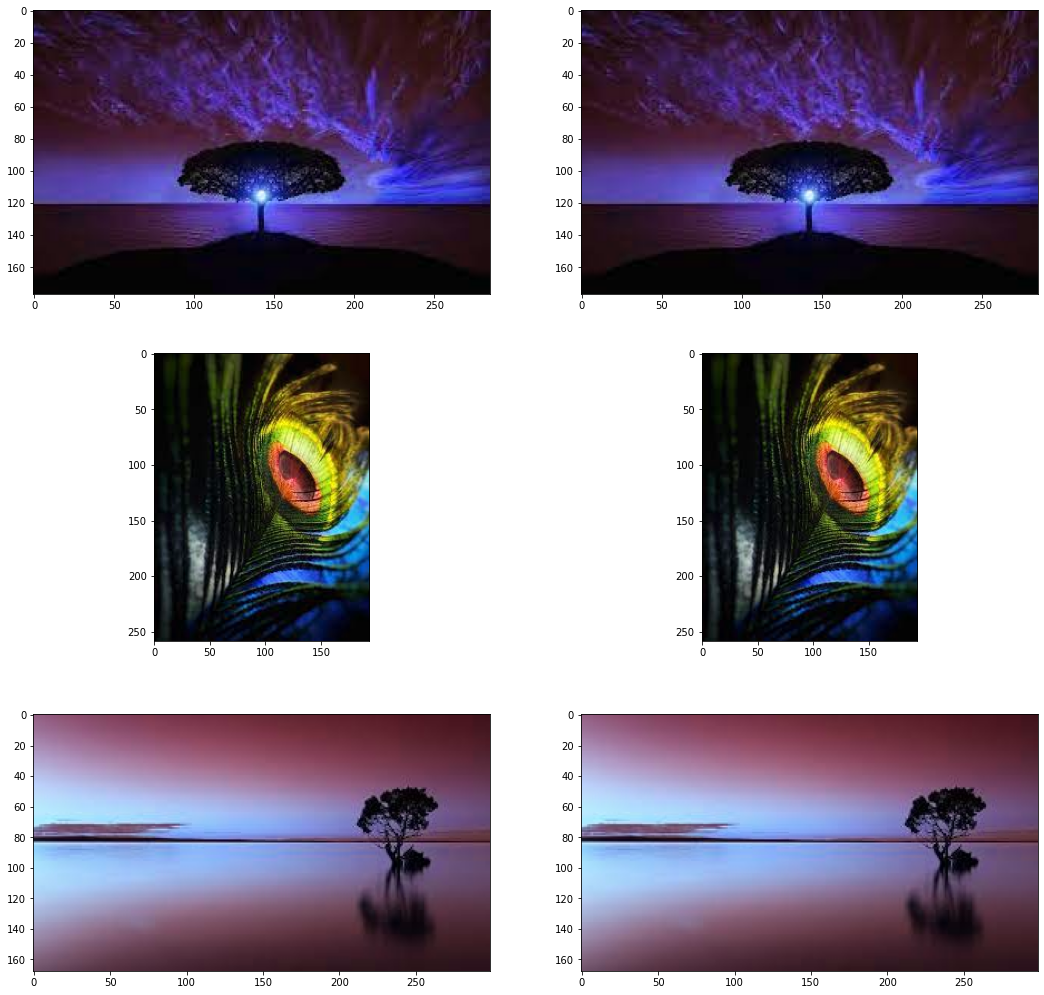

In [4]:
showImages([image1,image2,image3],[image1,image2,image3])

In [44]:
def noisy(noise_typ,image):
    if noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
      # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                for i in image.shape]
        out[coords] = 1

      # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ =="speckled":
        gauss = np.random.normal(0,1,image.size)
        gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
        return cv2.add(image, cv2.multiply(image, gauss))

In [45]:
images=[image1,image2,image3]

C:\Users\Ashwin\AppData\Local\Temp/ipykernel_16840/1796521972.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
C:\Users\Ashwin\AppData\Local\Temp/ipykernel_16840/1796521972.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


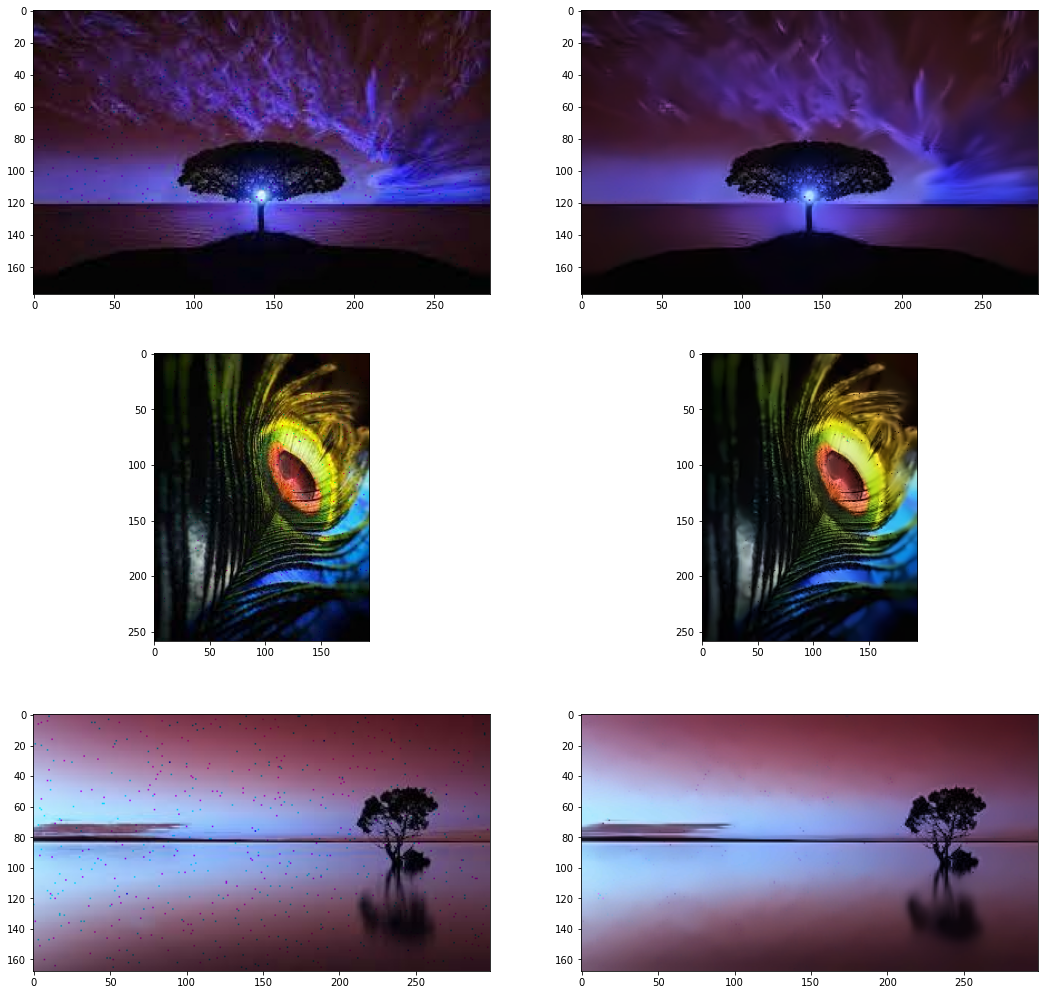

In [46]:
noisy_images=[noisy("s&p",i) for i in images]
denoised=[cv2.fastNlMeansDenoisingColored(i, None, 10, 10, 7, 15) for i in noisy_images]
showImages(noisy_images, denoised)

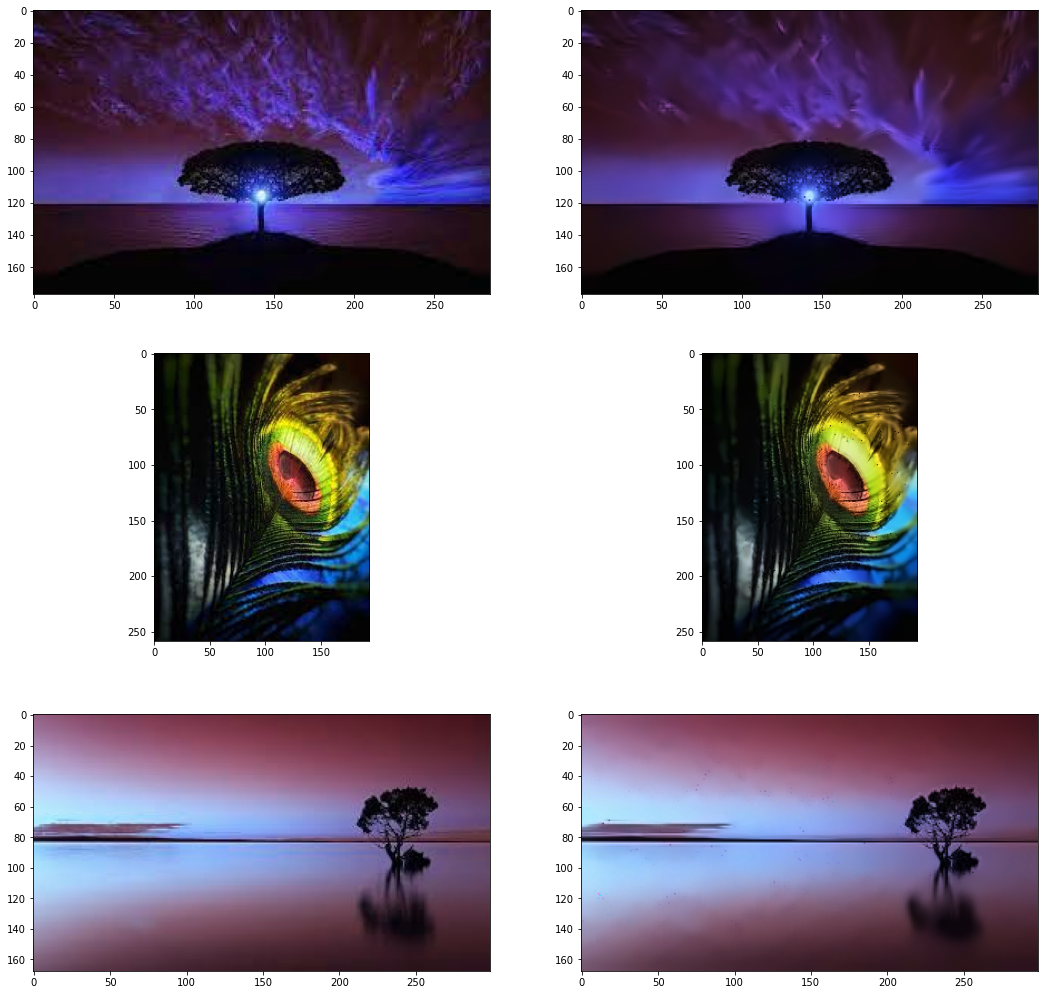

In [47]:
showImages(images,denoised)

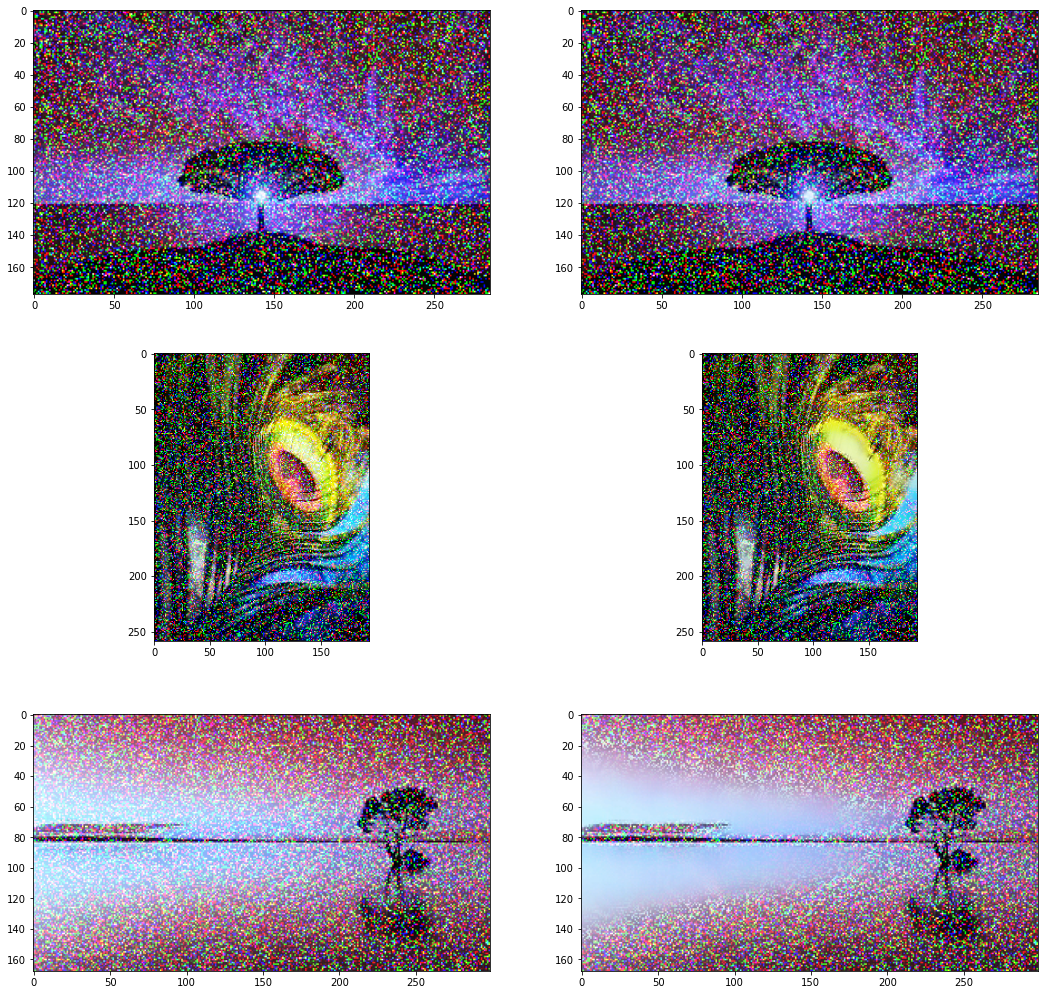

In [50]:
noisy_images=[noisy("speckled",i) for i in images]
denoised=[cv2.fastNlMeansDenoisingColored(i, None, 10, 10, 7, 15) for i in noisy_images]
showImages(noisy_images, denoised)